In [1]:
import numpy
from astropy import io
import astropy.units as u
from galpy import potential
%pylab inline
from galpy.util import plot as galpy_plot
galpy_plot.start_print(axes_labelsize=17.,text_fontsize=12.,
                       xtick_labelsize=15.,ytick_labelsize=15.)

Populating the interactive namespace from numpy and matplotlib


# Rotation curve decompositions of the SPARC rotation curves

To see what rotation curves tell us about the composition of galaxies, let's decompose some observed rotation curves from [Lelli et al. (2016)](https://ui.adsabs.harvard.edu/abs/2016AJ....152..157L/abstract) into a disk and dark-matter halo.

## The data

First we write some functions to load the observed rotations curves and associated data:

In [2]:
def unique_galaxies():
    """Return the set of galaxies included in the compilation"""
    raw= io.ascii.read('data/MassModels_Lelli2016c.mrt')
    return set(raw['ID'])
def read_data(galaxy):
    """Return the data for a given galaxy"""
    raw= io.ascii.read('data/MassModels_Lelli2016c.mrt')
    return raw[raw['ID'] == galaxy]
def bulgeless():
    allgals= unique_galaxies()
    out= ()
    for gal in allgals:
        data= read_data(gal)
        if numpy.all(numpy.fabs(data['Vbul']) < 1e-10):
            out= out+(gal,)
    return out

There are 175 galaxies included in this compilation:

In [3]:
len(unique_galaxies())

175

143 of these have little to no bulge component:

In [4]:
bulgeless_galaxies= bulgeless()
print(len(bulgeless_galaxies))

143


## Rotation curves

Now let's look at some rotation curves and fit them by hand by simple razor-thin exponential disk plus NFW halo models. First we write some functions to plot the observed rotation curve and to compute and plot a model decomposition:

In [5]:
def plot_obs_rotcurve(galaxy):
    data= read_data(galaxy)
    errorbar(data['R'],data['Vobs'],yerr=data['e_Vobs'],ls='none',color='k')
    xlim(0.,1.1*numpy.amax(data['R']))
    ylim(0.,1.3*numpy.amax(data['Vobs']))
    xlabel(r'$R\,(\mathrm{kpc})$')
    ylabel(r'$V_c\,(\mathrm{km\,s}^{-1})$')
    galpy_plot.text(r'$\mathrm{{{}}}$'.format(galaxy),size=18.,top_left=True)
    return [0.,1.1*numpy.amax(data['R'])]
def plot_rotcurve_model(RRange,disk_surfdens,disk_hr,halo_virial_mass,halo_conc):
    """Plot the rotation curve over a given range Rrange, 
    for a disk with central surface density disk_surfdens and scale length disk_hr
    and a halo with mass halo_virial_mass anc concentration halo_conc"""
    disk= potential.RazorThinExponentialDiskPotential(amp=disk_surfdens,hr=disk_hr)
    disk.plotRotcurve(Rrange=Rrange,overplot=True,label=r'$\mathrm{disk}$')
    halo= potential.NFWPotential(mvir=halo_virial_mass.to_value(1e12*u.Msun),conc=halo_conc,ro=8.,vo=220.)
    halo.plotRotcurve(Rrange=Rrange,overplot=True,label=r'$\mathrm{halo}$')
    potential.plotRotcurve(disk+halo,Rrange=Rrange,overplot=True,label=r'$\mathrm{total}$')
    legend(loc='lower right',frameon=False,fontsize=18.)
    return None

Let's look at the rotation curves for a few galaxies:

/Users/bovy/tmp/galpy-spheredf/galpy/potential/RazorThinExponentialDiskPotential.py:124: RuntimeWarning: invalid value encountered in double_scalars
  return -2.*numpy.pi*y*(special.i0(y)*special.k0(y)-special.i1(y)*special.k1(y))

/Users/bovy/tmp/galpy-spheredf/galpy/potential/TwoPowerSphericalPotential.py:1225: RuntimeWarning: divide by zero encountered in double_scalars
  return R*(1./Rz/(self.a+sqrtRz)-numpy.log(1.+sqrtRz/self.a)/sqrtRz/Rz)

/Users/bovy/tmp/galpy-spheredf/galpy/potential/TwoPowerSphericalPotential.py:1225: RuntimeWarning: invalid value encountered in double_scalars
  return R*(1./Rz/(self.a+sqrtRz)-numpy.log(1.+sqrtRz/self.a)/sqrtRz/Rz)



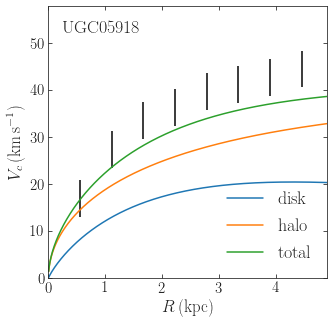

In [6]:
Rrange= plot_obs_rotcurve('UGC05918')
plot_rotcurve_model(Rrange,20.*u.Msun/u.pc**2,2.*u.kpc,2e10*u.Msun,10.)

and another one

/Users/bovy/tmp/galpy-spheredf/galpy/potential/RazorThinExponentialDiskPotential.py:124: RuntimeWarning: invalid value encountered in double_scalars
  return -2.*numpy.pi*y*(special.i0(y)*special.k0(y)-special.i1(y)*special.k1(y))

/Users/bovy/tmp/galpy-spheredf/galpy/potential/TwoPowerSphericalPotential.py:1225: RuntimeWarning: divide by zero encountered in double_scalars
  return R*(1./Rz/(self.a+sqrtRz)-numpy.log(1.+sqrtRz/self.a)/sqrtRz/Rz)

/Users/bovy/tmp/galpy-spheredf/galpy/potential/TwoPowerSphericalPotential.py:1225: RuntimeWarning: invalid value encountered in double_scalars
  return R*(1./Rz/(self.a+sqrtRz)-numpy.log(1.+sqrtRz/self.a)/sqrtRz/Rz)



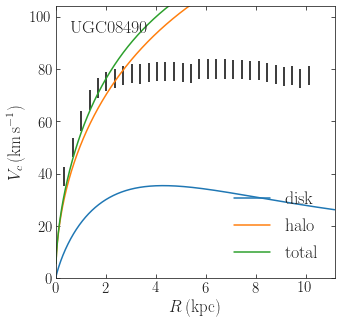

In [7]:
Rrange= plot_obs_rotcurve('UGC08490')
plot_rotcurve_model(Rrange,60.*u.Msun/u.pc**2,2.*u.kpc,1e12*u.Msun,15.)

and another one

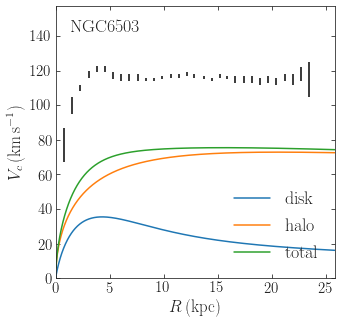

In [8]:
Rrange= plot_obs_rotcurve('NGC6503')
plot_rotcurve_model(Rrange,60.*u.Msun/u.pc**2,2.*u.kpc,1e11*u.Msun,15.)

By adjusting the parameters of the disk and halo, try to get as best of a fit to the observed rotation curve as you can!